In [15]:
%matplotlib inline

# Part 1

In [16]:
%run ipynb_src/per_iter_load.py

In [26]:
%run ipynb_src/per_iter_plot.py

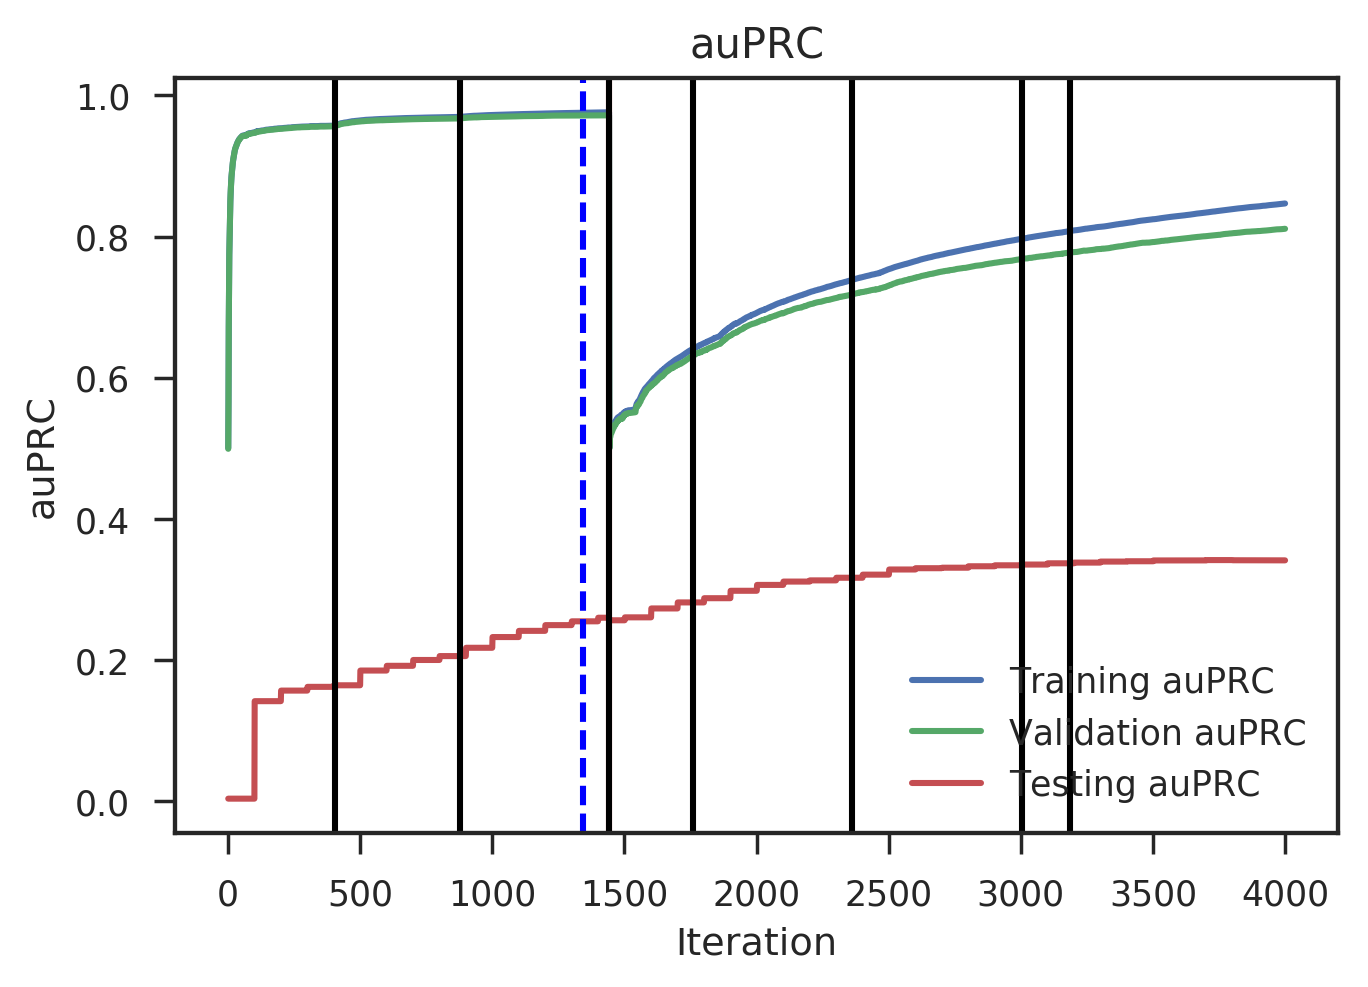

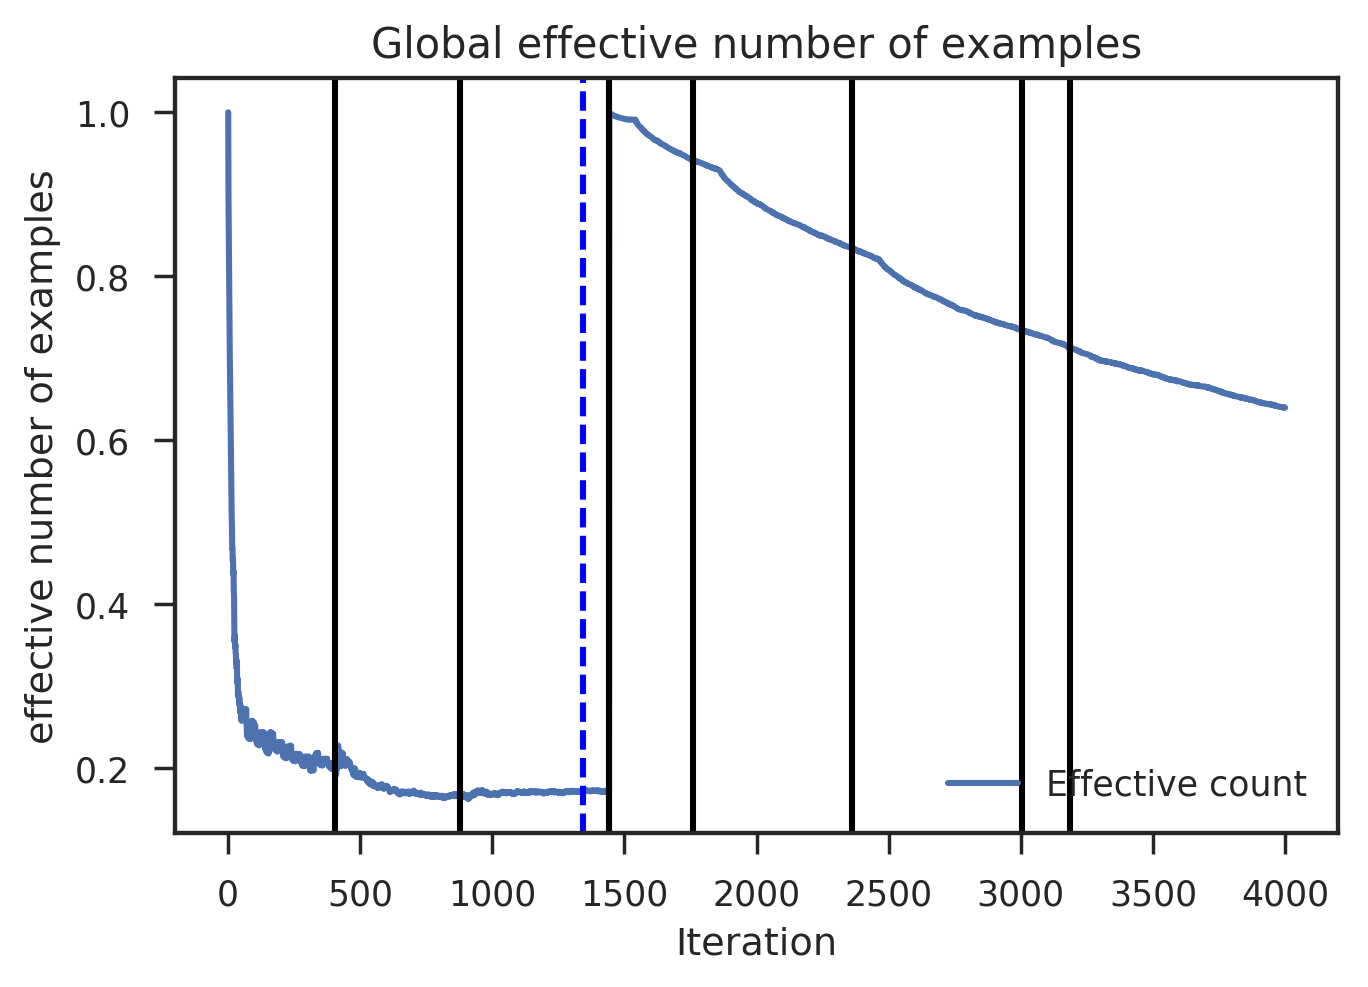

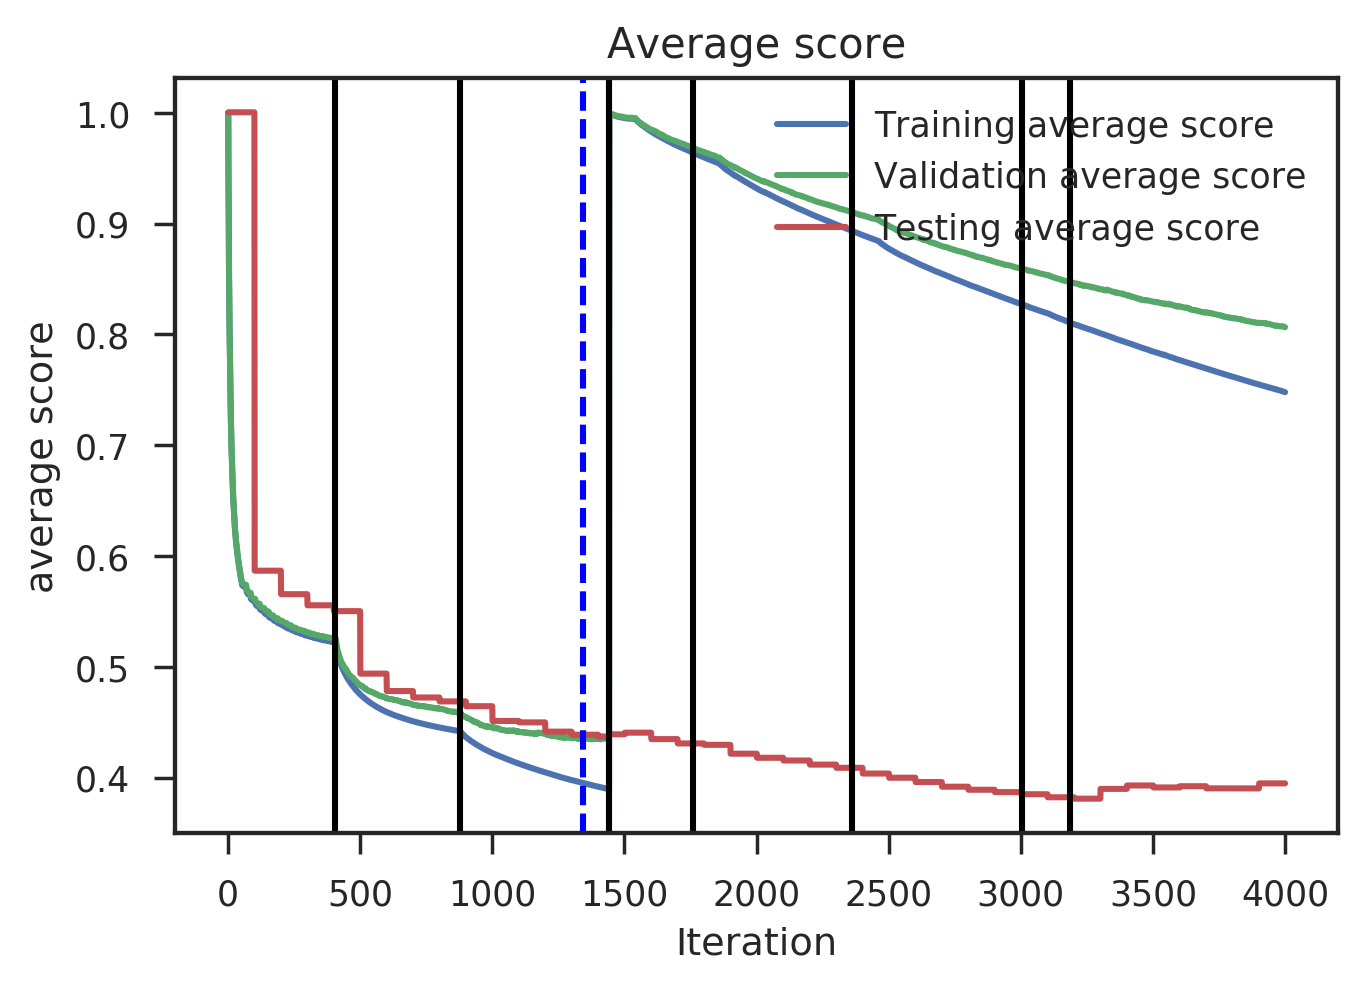

In [18]:
plotSample(labels, joint1, rollback1, 1.0, False)

In [38]:
%run ipynb_src/per_node_load.py

(0, 100000)

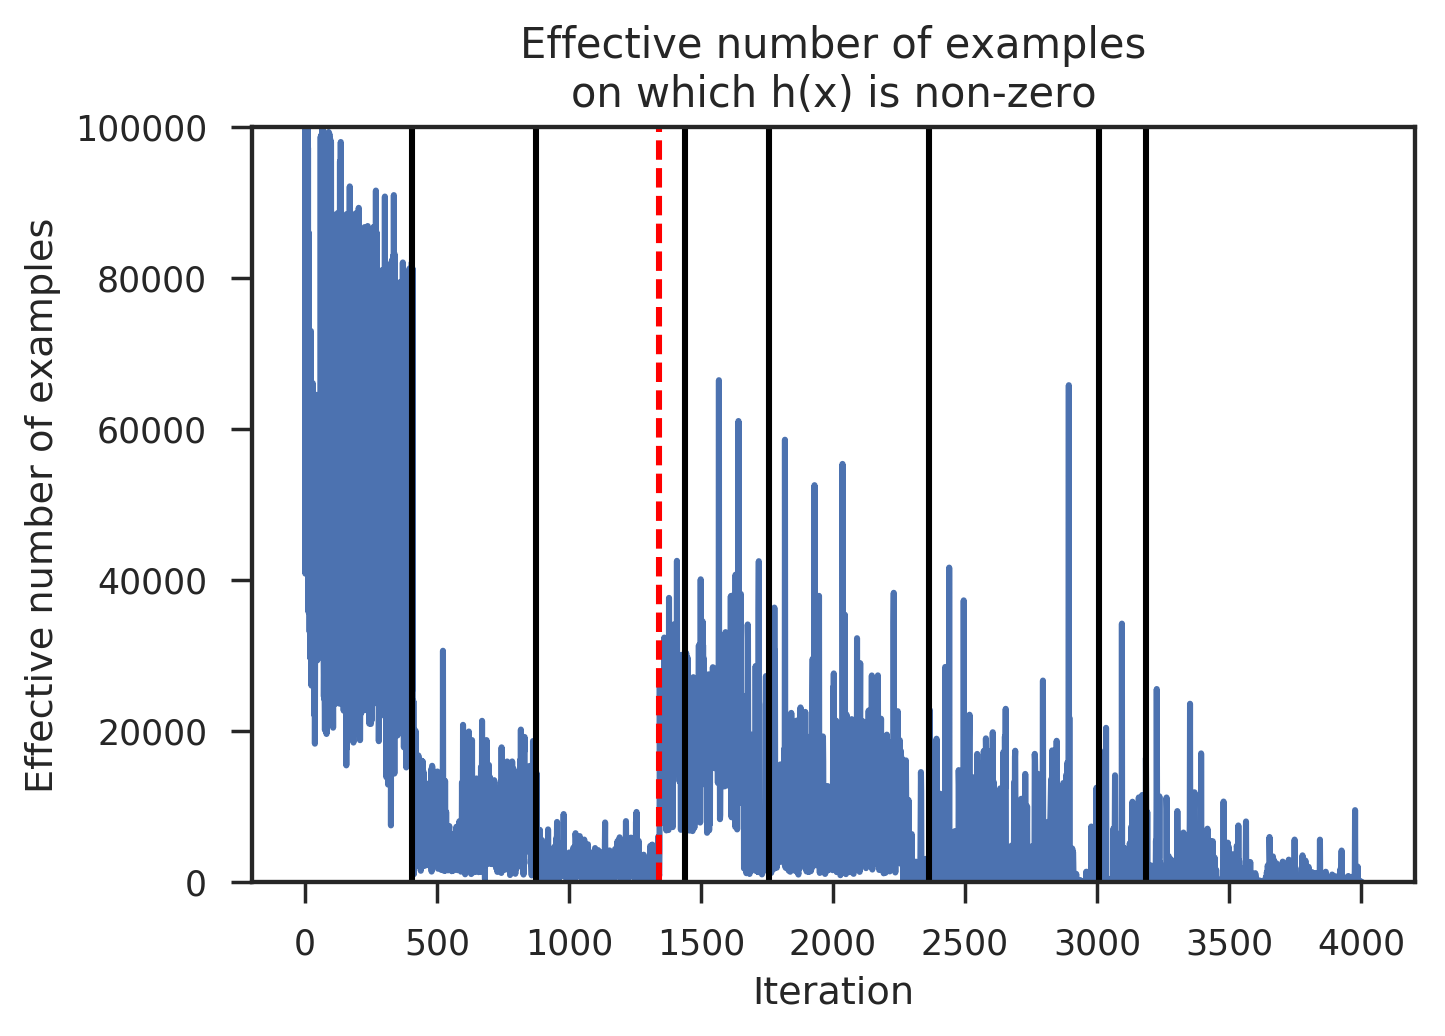

In [29]:
plt.figure(dpi=250)
plot(effectiveNum)
plt.title("Effective number of examples\non which h(x) is non-zero")
plt.ylabel("Effective number of examples")
plt.xlabel("Iteration")
plt.ylim(0, 100000)

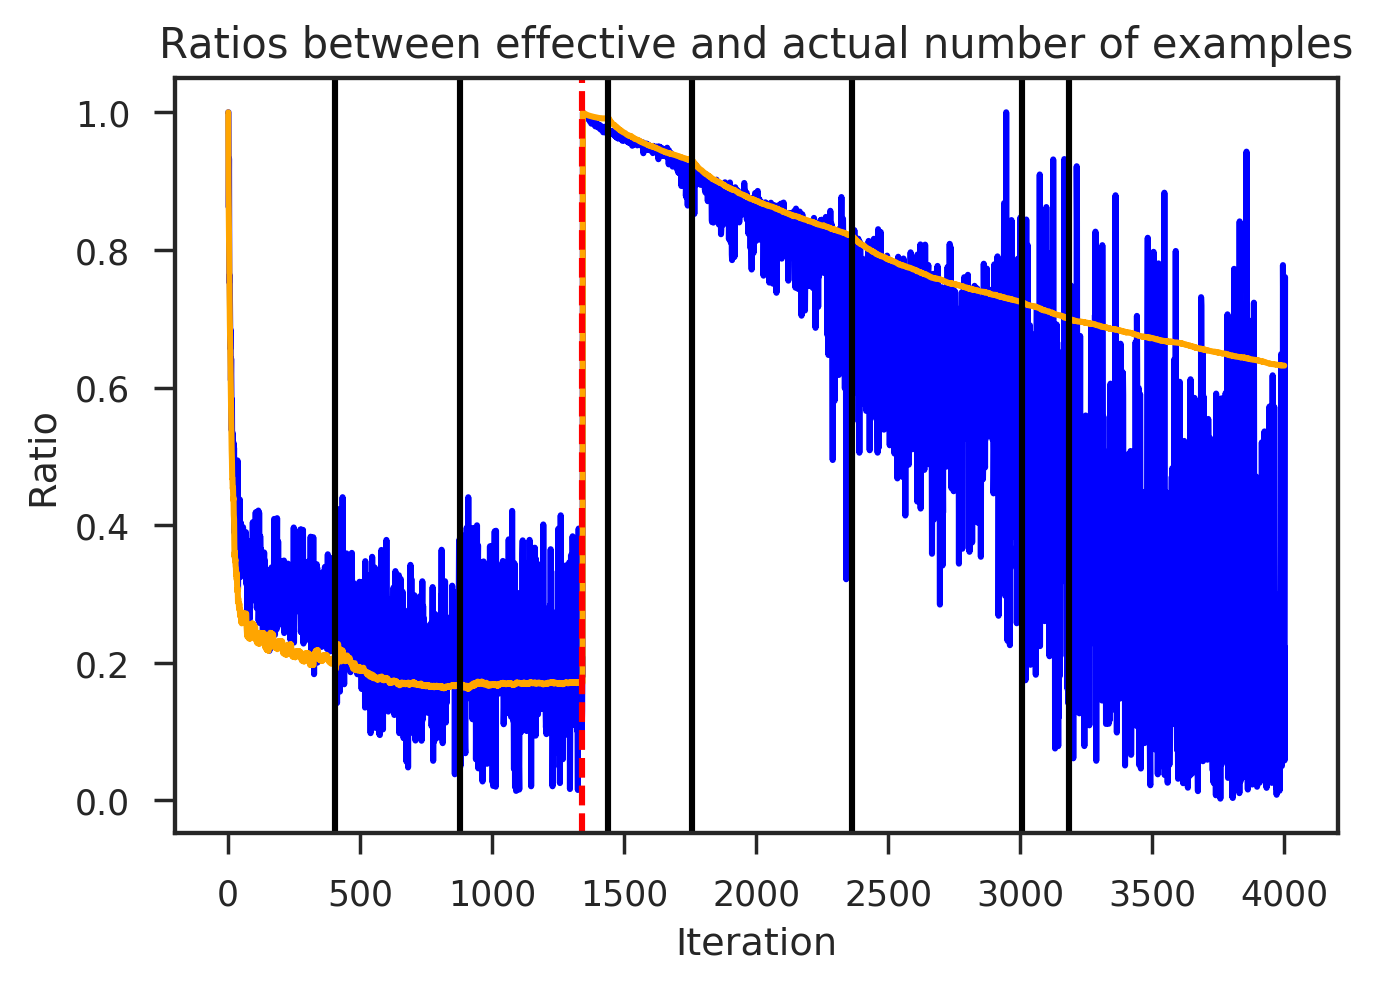

In [49]:
plt.figure(dpi=250)
plot(ratios, color="blue")
plt.title("Ratios between effective and actual number of examples")
plt.ylabel("Ratio")
plt.xlabel("Iteration")

globalEffectCount = joint1[-3][:1342] + joint1[-3][1441:]
plot(globalEffectCount[:4000], color='orange')

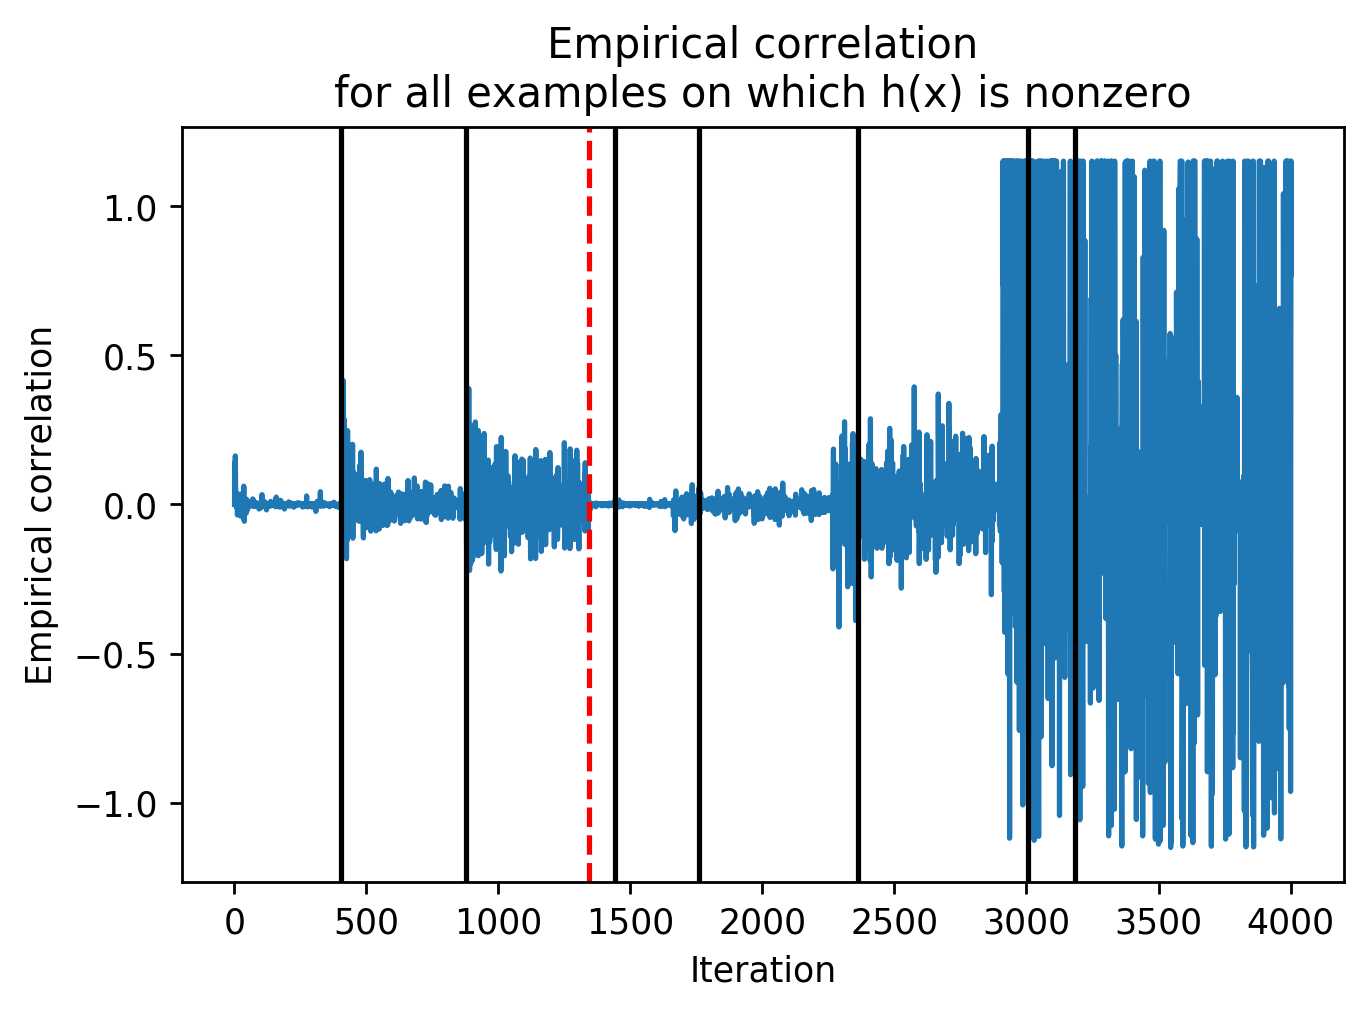

In [25]:
plt.figure(dpi=250)
plot(emprCorrNonzero)
plt.title("Empirical correlation\nfor all examples on which h(x) is nonzero")
plt.ylabel("Empirical correlation")
plt.xlabel("Iteration")

# Part 2

## Visualize the Tree

In [8]:
%run src/pydot-src.py

In [9]:
L = 3
depth1 = [0, 407, 878, 1441, 1760]

T = 40000
good = [False for i in range(T)]

for d in depth1[-1::-1]:
    for i in range(d+1, d+L):
        good[i] = True

for idx, t in reversed(list(enumerate(trees[:]))):
    if idx < len(good) and good[idx] and 0 <= t[1] < T:
        good[t[1]] = True
    elif idx < len(good) and good[idx]:
        print(t[1])

good[1761] = False
good[1365] = False
good[372] = False
good[1761] = False
good[1761] = False
good[1] = False
sum(good)

-1


17

In [11]:
# del graph

graph = pydot.Dot(graph_type='graph', ordering="out")
added = set([])

T = 4000
addLast = []
for idx, t in enumerate(trees[:T]):
    if good[idx]:
        # print(t)
        addNode(idx, added, graph)
        if t[1] >= 0:
            addNode(t[1], added, graph)
            edge = pydot.Edge("s" + str(t[1]), str(idx), dir="forward", style="dashed")
            if t[2] == 1:
                addLast.append((posMap[trees[idx][-1][0]][0], edge))
            else:
                graph.add_edge(edge)
for e in sorted(addLast, key=lambda t: t[0]):
    graph.add_edge(e[1])
graph.write_png('tree.png')
len(added)

17

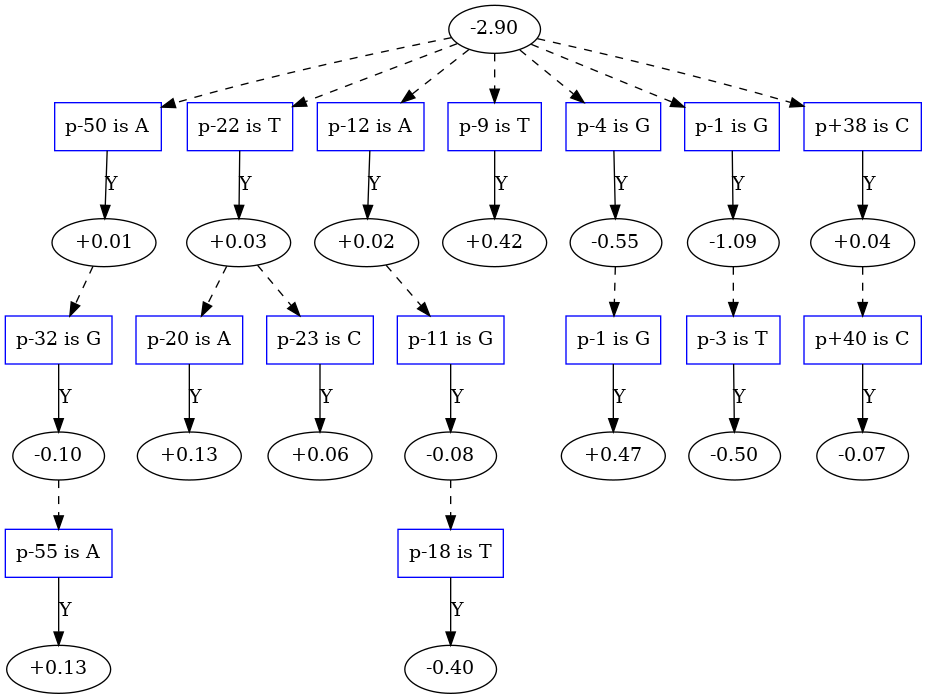

In [12]:
from IPython.display import Image
Image(filename='tree.png')

## Sequence Logo

In [7]:
%run ipynb_src/seq_logo.py

In [5]:
base = "/home/arapat/workspace/research/boosting/data/"
filepath = base + "others/desc-010-L1.txt"
scores = getScores(filepath)

pscores = []
for i in range(len(scores[0])):
    r = []
    for t in scores[0][i]:
        r.append((t[0], t[2], t[1]))
    for t in scores[1][i]:
        r.append((t[0], -t[2], t[1]))
    pscores.append(r)
print(len(pscores))
pscores = pscores[:59] + [[], []] + pscores[59:]

139


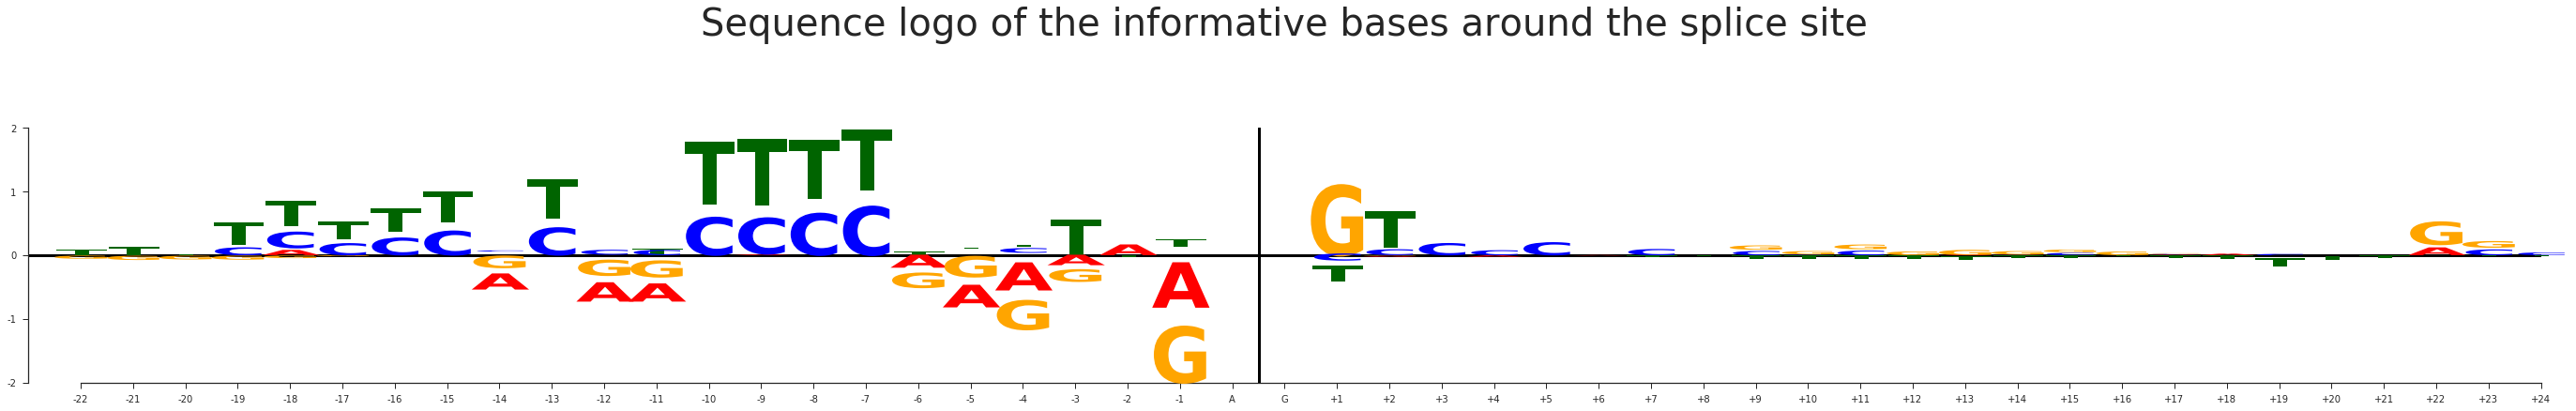

In [13]:
draw_logo(pscores[37:85], list(range(37, 85)))